In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读入数据

In [3]:
path="ex6data1.txt"
data=pd.read_csv(path,header=None,names=["X1","X2","Y"])
data.head()

,X1,X2,Y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


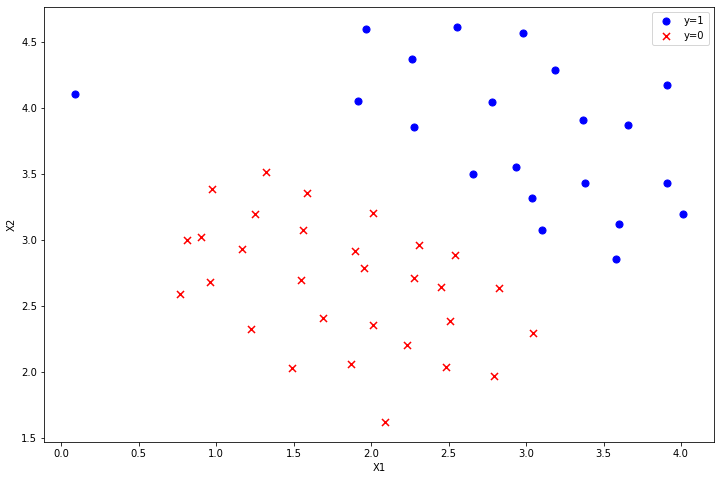

In [4]:
positive = data[data['Y']==1]
negative = data[data['Y']==0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, c='b', marker='o', label='y=1')
ax.scatter(negative['X1'], negative['X2'], s=50, c='r', marker='x', label='y=0')
ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [12]:
X = data[["X1","X2"]].values

In [15]:
Y = data["Y"].values

### 导入sk库

In [7]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.svm import LinearSVC

In [11]:
from sklearn.pipeline import Pipeline

# pipeline拼接

In [53]:
svm_clf = Pipeline([
    ("scalar",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
])

In [54]:
svm_clf.fit(X,Y)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [55]:
svm_clf.score(X,Y)

0.9803921568627451

# C=1

In [56]:
data['SVM Confidence'] = svm_clf.decision_function(X)

Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

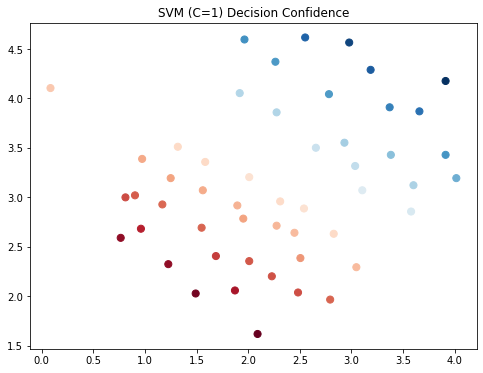

In [57]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')

# C=100

In [48]:
svm_clf = Pipeline([
    ("scalar",StandardScaler()),
    ("linear_svc",LinearSVC(C=100,loss="hinge"))
])

In [49]:
svm_clf.fit(X,Y)

c:\users\wxl\.virtualenvs\testvirtual-ee4p-oil\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [50]:
svm_clf.score(X,Y)

1.0

In [51]:
data['SVM Confidence'] = svm_clf.decision_function(X)

Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

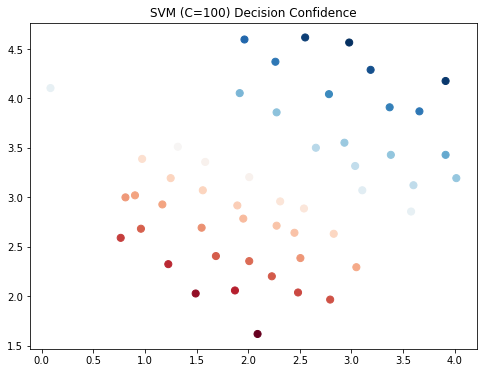

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')

# 自行解决

In [81]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X) #

In [82]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1)
svc.fit(X_standard, Y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [83]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

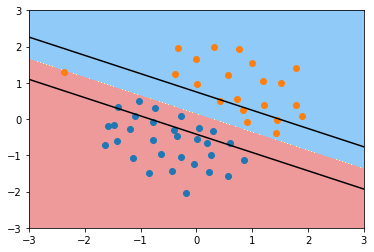

In [84]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[Y==0,0], X_standard[Y==0,1])
plt.scatter(X_standard[Y==1,0], X_standard[Y==1,1])
plt.show()

In [85]:
svc2 = LinearSVC(C=100)
svc2.fit(X_standard, Y)

c:\users\wxl\.virtualenvs\testvirtual-ee4p-oil\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

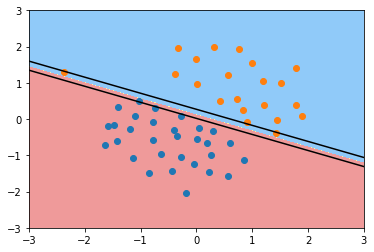

In [86]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[Y==0,0], X_standard[Y==0,1])
plt.scatter(X_standard[Y==1,0], X_standard[Y==1,1])
plt.show()